In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images

Using TensorFlow backend.


## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.expand_dims(X_train, axis=3).astype('float32')
X_test = np.expand_dims(X_test, axis=3).astype('float32')

## Load model

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_mnist.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [4]:
out = model.evaluate_generator(
    RotNetDataGenerator(
        X_test,
        batch_size=128,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    val_samples=len(y_test)
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 2.6799629158
Test angle error: 6.6618


## Display examples

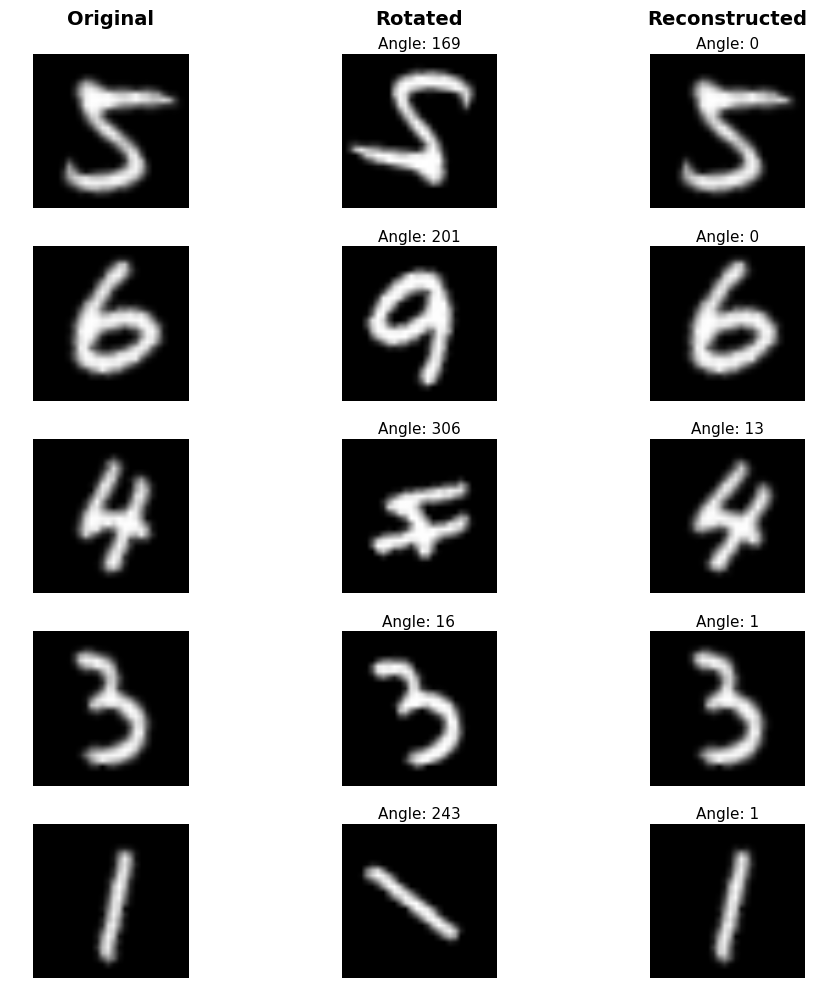

In [5]:
num_images = 5

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)